In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [18]:
df = pd.read_csv("f1_scores.csv")
df

,Macro F1 score weight distribution,Base Deepseek 8bit,Fine-Tuned Deepseek 4 bit,Fine-Tuned Deepseek 8 bit,Llama 3 billion parameter
0,Macro F1 score with equal weight,0.478965,0.529807,0.590996,0.582662
1,Heavier weight on stability,0.431204,0.478216,0.563622,0.546909
2,Heavier weight on perovskite structure,0.490628,0.540545,0.593914,0.591821
3,Heavier weight on numeric data,0.489202,0.542935,0.592720,0.580230
4,Weight to perform prediction 1,0.657539,0.671424,0.655673,0.651199
5,Weight to perform prediction 2,0.640238,0.699868,0.679721,0.682697
6,Weight to perform prediction 3,0.411219,0.441058,0.537293,0.507860


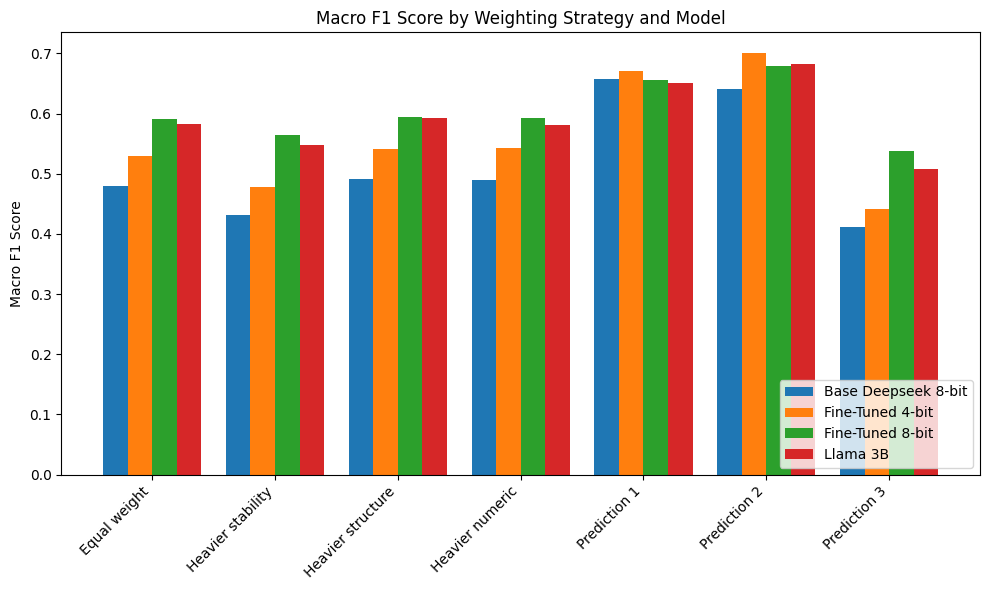

In [19]:
# 1. Define the data
weighting_strategies = [
    "Equal weight",
    "Heavier stability",
    "Heavier structure",
    "Heavier numeric",
    "Prediction 1",
    "Prediction 2",
    "Prediction 3"
]

# Corresponding Macro F1 scores for each model
base_ds_8bit =       [0.478955, 0.431204, 0.496238, 0.411069, 0.575539, 0.408203, 0.411219]
fine_tuned_ds_4bit = [0.528907, 0.478216, 0.569683, 0.492905, 0.534993, 0.523868, 0.441082]
fine_tuned_ds_8bit = [0.599368, 0.536322, 0.520993, 0.561339, 0.555231, 0.519707, 0.436868]
llama_3b =           [0.528622, 0.454969, 0.518221, 0.469306, 0.565199, 0.480315, 0.424736]

# 2. Set up bar positions
x = np.arange(len(weighting_strategies))  # positions for each weighting strategy
width = 0.2  # width of each bar

# 3. Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# 4. Plot each model’s bar group
rects1 = ax.bar(x - 1.5*width, df['Base Deepseek 8bit'],       width, label='Base Deepseek 8-bit')
rects2 = ax.bar(x - 0.5*width, df['Fine-Tuned Deepseek 4 bit'], width, label='Fine-Tuned 4-bit')
rects3 = ax.bar(x + 0.5*width, df['Fine-Tuned Deepseek 8 bit'], width, label='Fine-Tuned 8-bit')
rects4 = ax.bar(x + 1.5*width, df['Llama 3 billion parameter'],           width, label='Llama 3B')

# 5. Labeling and final touches
ax.set_ylabel('Macro F1 Score')
ax.set_title('Macro F1 Score by Weighting Strategy and Model')
ax.set_xticks(x)
ax.set_xticklabels(weighting_strategies, rotation=45, ha='right')
ax.legend()

ax.legend(loc='lower right')
# Adjust layout so labels don’t overlap
plt.tight_layout()
plt.show()


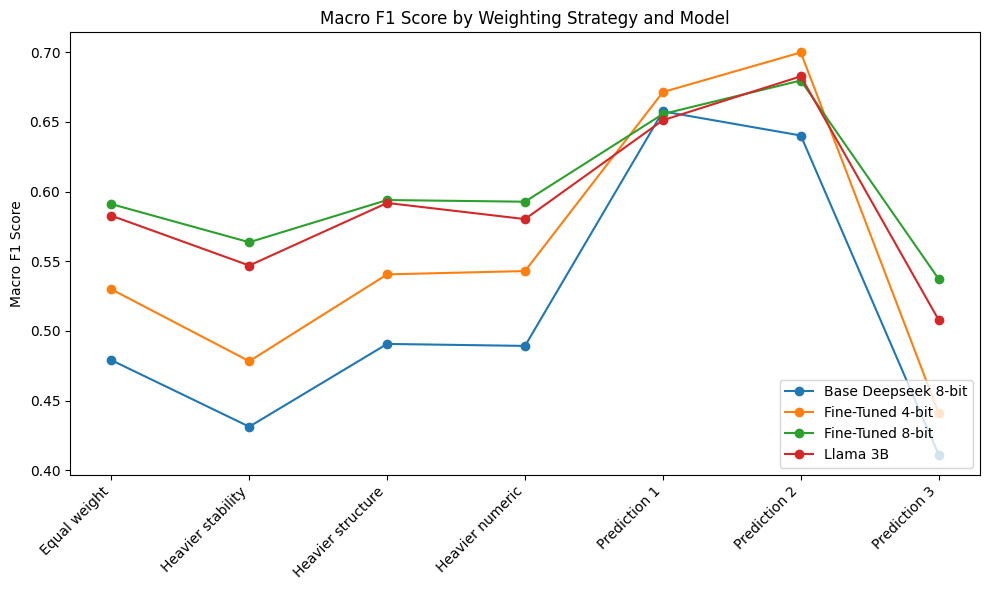

In [20]:
##NOT THE BEST ONE

weighting_strategies = [
    "Equal weight",
    "Heavier stability",
    "Heavier structure",
    "Heavier numeric",
    "Prediction 1",
    "Prediction 2",
    "Prediction 3"
]

# Create an array for the x-axis positions
x = np.arange(len(weighting_strategies))

# Create the figure
plt.figure(figsize=(10, 6))

# Plot each model's Macro F1 scores as a line
plt.plot(x, df['Base Deepseek 8bit'], marker='o', label='Base Deepseek 8-bit')
plt.plot(x, df['Fine-Tuned Deepseek 4 bit'], marker='o', label='Fine-Tuned 4-bit')
plt.plot(x, df['Fine-Tuned Deepseek 8 bit'], marker='o', label='Fine-Tuned 8-bit')
plt.plot(x, df['Llama 3 billion parameter'], marker='o', label='Llama 3B')

# Set the x-axis ticks and labels
plt.xticks(x, weighting_strategies, rotation=45, ha='right')

# Add labels and title
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score by Weighting Strategy and Model')

# Place the legend at the lower right corner
plt.legend(loc='lower right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


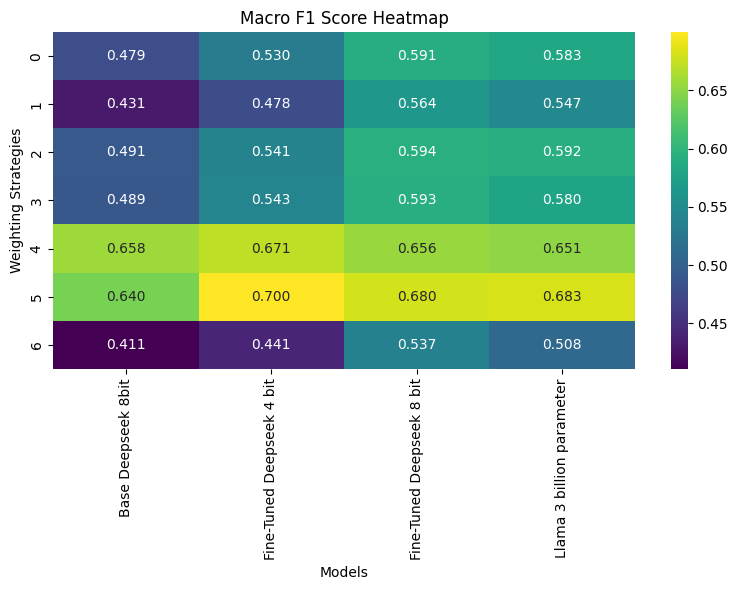

In [23]:

weighting_strategies = [
    "Equal weight",
    "Heavier stability",
    "Heavier structure",
    "Heavier numeric",
    "Prediction 1",
    "Prediction 2",
    "Prediction 3"
]


# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Base Deepseek 8bit", "Fine-Tuned Deepseek 4 bit", "Fine-Tuned Deepseek 8 bit", "Llama 3 billion parameter"]], annot=True, cmap="viridis", fmt=".3f")
plt.title("Macro F1 Score Heatmap")
plt.ylabel("Weighting Strategies")
plt.xlabel("Models")
plt.tight_layout()
plt.show()


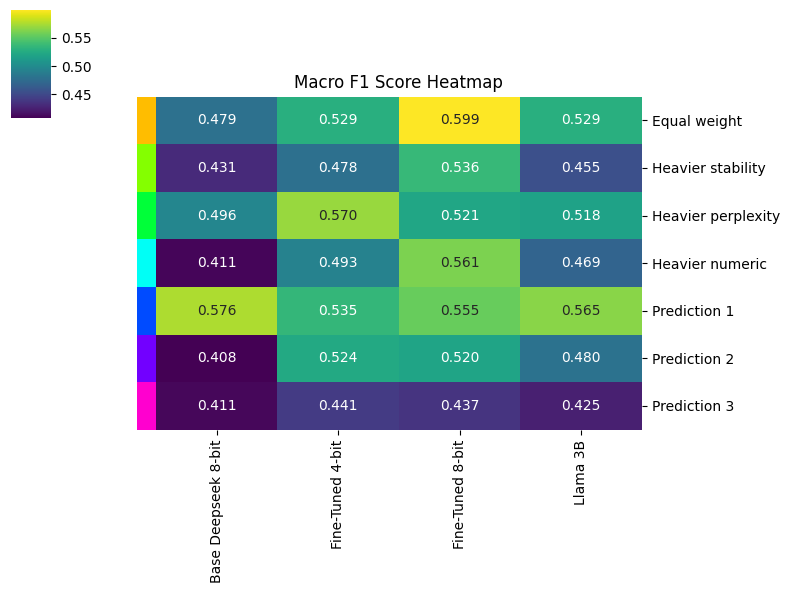

In [29]:
data = {
    "Base Deepseek 8-bit": [0.478955, 0.431204, 0.496238, 0.411069, 0.575539, 0.408203, 0.411219],
    "Fine-Tuned 4-bit":    [0.528907, 0.478216, 0.569683, 0.492905, 0.534993, 0.523868, 0.441082],
    "Fine-Tuned 8-bit":    [0.599368, 0.536322, 0.520993, 0.561339, 0.555231, 0.519707, 0.436868],
    "Llama 3B":            [0.528622, 0.454969, 0.518221, 0.469306, 0.565199, 0.480315, 0.424736]
}

weighting_strategies = [
    "Equal weight",
    "Heavier stability",
    "Heavier perplexity",
    "Heavier numeric",
    "Prediction 1",
    "Prediction 2",
    "Prediction 3"
]

# Build the DataFrame (rows: weighting strategies, columns: models)
df = pd.DataFrame(data, index=weighting_strategies)


# Define a color mapping for each weighting strategy using a discrete palette
palette = sns.color_palette("hsv", len(weighting_strategies))
color_mapping = {strategy: palette[i] for i, strategy in enumerate(weighting_strategies)}

# Create a list of row colors corresponding to each weighting strategy in the DataFrame
row_colors = [color_mapping[strategy] for strategy in df.index]

# Create the clustermap; disable clustering to preserve the original order
g = sns.clustermap(df, 
                   row_cluster=False, 
                   col_cluster=False, 
                   row_colors=row_colors, 
                   cmap="viridis", 
                   annot=True, 
                   fmt=".3f", 
                   figsize=(8, 6))

g.ax_heatmap.set_title("Macro F1 Score Heatmap")

# Create custom legend handles from the color mapping
handles = [mpatches.Patch(color=color_mapping[strategy], label=strategy) for strategy in weighting_strategies]
# Place the legend on the heatmap axes; adjust bbox_to_anchor and loc as desired
# g.ax_heatmap.legend(handles=handles, title="Weighting Strategies", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
